In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [18]:
def Model1_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, gamma_1, gamma_2, gamma_3, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_Job = 0 
    
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_Job = 0 
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_Job = 0 
    
    
    
    # Initalise vector to store the time 
    Time_v = []
    
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*4)
    if(lambda_1 > 0):
        EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    else:
        EC[0] = TERM+1
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        #print(EC)
        iteration +=1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        

        # Next event is arrival of a CE
        if(ENEXT==0):
           # print('CE arrival')
            
            # Increase CE arrivals by 1 
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):
                
                
                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        #print('CE matches with job')
                        # CE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE and job matches by 1
                        Matches_CE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                
                        break
                
            # If there are no matches found or possible then CE joins the queue 
            if(m == 0):
              #  print('No match join queue')
                # update EC to inlude abandonment time of that CE 
                EC=np.insert(EC, (4+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_1)))
                
                # Joins queue 
                Q1 += 1
                
                
                
            # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        
        
        # Next event is arrival of a EE
        elif(ENEXT==1):
           # print('EE arrival')
            
            # Increase EE arrivals by 1 
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):

                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                       # print('EE matches with job')
                        # EE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and job matches by 1
                        Matches_EE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                        break
                
            # If there are no matches found or possible then EE joins the queue 
            if(m == 0):
              #  print('No match join queue ')
                # update EC to inlude abandonment time of that EE 
                EC=np.insert(EC, (4+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_2)))
    
                
                # Joins queue 
                Q2 += 1
                
            
                
                
            # Update EC to include next arrival time of EE
            EC[1]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_2)
            
        # Next event is arrival of job 
        elif(ENEXT == 2):
          #  print('Job arrival')
            
            # Initialise matches to be 0 
            m = 0 
            
            # Increase arrivals by 1
            Arrivals_Job += 1
            
            # CE > EE so first check if there are matches with CE
            if(Q1 > 0):
                
                # Loop through each CE and check for a match
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-r (probability of matching) then a match is found
                    if(u < (1-r1)):
                        
                        # Job Matches and leaves the system with the CE
                       # print('Job Matches with CE')
                        m += 1 
                        Q1 -= 1
                        
                        # Increase matches of job and CE by 1 
                        Matches_Job += 1
                        Matches_CE += 1 
                        
                        # Update event calender to remove abandonment time of the CE 
                        EC = np.delete(EC, (4+i))
                        break 
                        
            # If job didnt match with CE and there are EEs check for match
            if(Q2 > 0 and m == 0):
                
                # Loop through each EE and check for a match 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-2 (probability of matching) then a match is found
                    if(u < (1-r2)):
                      #  print('Job matches with EE')
                        # Job Matches and leaves the system with the EE
                        
                        m += 1 
                        Q2 -= 1
                        
                        # Increase matches of job and EE by 1 
                        Matches_Job += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the EE 
                        EC = np.delete(EC, (4+Q1+i))
                        break
            # If no CE or EE to match or no match found, then job joins the job queue  
            if(m == 0):
             #   print('No match join queue')
                # Update EC to include abandonment time of the job
                EC = np.insert(EC, (4+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_3)))
                # Job joinss job queue 
                Q3 += 1 
                
            # Update event calander to include next arrival of job 
            EC[2]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is abandonment of CE
        elif((ENEXT>3) and (ENEXT<=(3+Q1))):
          #  print('CE abandonment')
            # Q1 decreases by 1 
            Q1 -= 1
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time from event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        # If next event is an abandonment of EE (Q2)
        elif((ENEXT>(3+Q1)) and (ENEXT<=(3+Q1+Q2))):
          #   print('EE abandonment')
            # Q2 decreases by 1 
             Q2 -= 1
            # Abandonment Increases by 1
             Abandonment_EE += 1
            # Remove abandonment time from event calendar 
             EC = np.delete(EC, ENEXT)
            #print('Q2 abandonment')
            #print(EC)
        
        # Next event is abandonment of Job (Q3)
        elif((ENEXT>(3+Q1+Q2)) and (ENEXT<=(3+Q1+Q2+Q3))):
            # Q3 decreases by 1
            Q3 -= 1
             # Abandonment increases by 1
            Abandonment_Job += 1
             # Remove abandonment time from event calendar
            EC = np.delete(EC, ENEXT)
             
        
             
    T_Q = AQ1+AQ2+AQ3  
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_Job > 0):
        JobMatchRate = Matches_Job/Arrivals_Job
        JobAbandonRate = Abandonment_Job/Arrivals_Job
    else:
        JobMatchRate = 0
        JobAbandonRate = 0 
    if(Arrivals_CE +Arrivals_EE+Arrivals_Job > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    
    
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_Total= T_Q/TERM
    

     return Av_AQ1, Av_AQ2, Av_AQ3, CEMatchRate, EEMatchRate, JobMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JobAbandonRate, TotalAbandonRate , Av_Total



             
             

        
        
                
                        
            
                
                
        

In [19]:
print(datetime. now())
q2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

CE_Match_rates = []
EE_Match_rates = []
Job_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
Job_Abandon_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
Job_Queue_length = []
Total_Queue_length = []



for i in range(len(q2)):
    print(q2[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    Job_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    Job_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    Job_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(10):
        print(j)
        print(datetime. now())
        rep_results=Job_sim(0.75, q2[i], 1, 1, 1, 0.1, 0.1, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[3])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[4])
        Job_Rep_m_rate = np.append(Job_Rep_m_rate, rep_results[5])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[6])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[7])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[8])
        Job_Rep_a_rate = np.append(Job_Rep_a_rate, rep_results[9])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[10])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        Job_Rep_q_length = np.append(Job_Rep_q_length, rep_results[2])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[11])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    Job_Match_rates = np.append(Job_Match_rates, np.average(Job_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    Job_Abandon_rates = np.append(Job_Abandon_rates, np.average(Job_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    Job_Queue_length = np.append(Job_Queue_length, np.average(Job_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(Job_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(Job_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(Job_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-13 12:25:46.755600
0
0
0
2023-08-13 12:25:46.762086
1
2023-08-13 12:26:02.546899
2
2023-08-13 12:26:22.038873
3
2023-08-13 12:26:36.556395
4
2023-08-13 12:26:49.228100
5
2023-08-13 12:27:01.801894
6
2023-08-13 12:27:14.490013
7
2023-08-13 12:27:27.332694
8
2023-08-13 12:27:42.123100
9
2023-08-13 12:27:54.994667
[0.88939632]
[0.]
[0.88975184]
[0.59315459]
[0.11055704]
[0.99970062]
[0.11020823]
[0.40671681]
[1.11489884]
[10.02626811]
[2.20129651]
[13.34246346]
0.1
1
0
2023-08-13 12:28:07.924782
1
2023-08-13 12:28:19.131446
2
2023-08-13 12:28:31.528098
3
2023-08-13 12:28:43.048183
4
2023-08-13 12:28:54.138192
5
2023-08-13 12:29:05.073926
6
2023-08-13 12:29:16.183037
7
2023-08-13 12:29:27.153550
8
2023-08-13 12:29:44.273718
9
2023-08-13 12:29:58.877175
[0.88939632 0.78855516]
[0.         0.19821231]
[0.88975184 0.98691704]
[0.59315459 0.65760239]
[0.11055704 0.21134148]
[0.99970062 0.80154091]
[0.11020823 0.01306964]
[0.40671681 0.34227634]
[1.11489884 2.12362892]
[10.02626811  8.0

1
2023-08-13 12:44:13.582240
2
2023-08-13 12:44:30.354153
3
2023-08-13 12:44:48.809653
4
2023-08-13 12:45:03.921920
5
2023-08-13 12:45:17.945516
6
2023-08-13 12:45:30.576648
7
2023-08-13 12:45:42.484716
8
2023-08-13 12:45:56.099573
9
2023-08-13 12:46:11.529571
[0.88939632 0.78855516 0.76835324 0.76061753 0.75698903 0.75507808
 0.75370444 0.75333148 0.75337971 0.75367487]
[0.         0.19821231 0.22709373 0.23751037 0.24260439 0.24627922
 0.24348904 0.24523242 0.24940689 0.2495918 ]
[0.88975184 0.98691704 0.99479715 0.99729381 0.99835688 0.99875577
 0.9991147  0.99928697 0.99940058 0.99938557]
[0.59315459 0.65760239 0.66350318 0.66505175 0.66619759 0.66689431
 0.66557713 0.6661579  0.66716284 0.66809817]
[0.11055704 0.21134148 0.23154999 0.2392753  0.24293089 0.24483849
 0.24621257 0.24658186 0.24654988 0.24620137]
[0.99970062 0.80154091 0.7726898  0.76221642 0.75714583 0.75341821
 0.75627749 0.75452709 0.7503435  0.75013804]
[0.11020823 0.01306964 0.00520285 0.00270619 0.00164312 0.001

In [15]:
# Results
q2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
CE_Match_rates = [0.88939632, 0.78855516, 0.76835324, 0.76061753, 0.75698903, 0.75507808, 0.75370444, 0.75333148, 0.75337971, 0.75367487, 0.75235328]
EE_Match_rates = [0.0, 0.19821231, 0.22709373, 0.23751037, 0.24260439, 0.24627922, 0.24348904, 0.24523242, 0.24940689, 0.2495918, 0.24759963]
Job_Match_rates = [0.88975184, 0.98691704, 0.99479715, 0.99729381, 0.99835688, 0.99875577, 0.9991147, 0.99928697, 0.99940058, 0.99938557, 0.99941544]
Total_Match_rates = [0.59315459, 0.65760239, 0.66350318, 0.66505175, 0.66619759, 0.66689431, 0.66557713, 0.6661579, 0.66716284, 0.66809817, 0.66702226]
CE_Abandon_rates = [0.11055704, 0.21134148, 0.23154999, 0.2392753, 0.24293089, 0.24483849, 0.24621257, 0.24658186, 0.24654988, 0.24620137, 0.24760701]
EE_Abandon_rates = [0.99970062, 0.80154091, 0.7726898, 0.76221642, 0.75714583, 0.75341821, 0.75627749, 0.75452709, 0.7503435, 0.75013804, 0.75219029]
Job_Abandon_rates = [0.11020823, 0.01306964, 0.00520285, 0.00270619, 0.00164312, 0.00124423, 0.00088196, 0.00071303, 0.00059942, 0.00061443, 0.00058456]
Total_Abandon_rates = [0.40671681, 0.34227634, 0.33639247, 0.33482141, 0.3336926, 0.33297718, 0.33431632, 0.33373309, 0.33273048, 0.33177079, 0.33289458]
CE_Queue_length = [1.11489884, 2.12362892, 2.33455031, 2.39531268, 2.42494261, 2.44920793, 2.47397063, 2.46180396, 2.44795163, 2.4572934, 2.48464519]
EE_Queue_length = [10.02626811, 8.01417026, 7.71745482, 7.62863386, 7.57022793, 7.5438344, 7.54897033, 7.51221245, 7.51997261, 7.51526741, 7.51210753]
Job_Queue_length = [2.20129651, 0.25870918, 0.10516751, 0.0551231, 0.03326719, 0.02372258, 0.01740725, 0.01481131, 0.01272654, 0.01272766, 0.01038386]
Total_Queue_length = [13.34246346, 10.39650836, 10.15717264, 10.07906963, 10.02843773, 10.01676491, 10.04034821, 9.98882772, 9.98065079, 9.98528847, 10.00713658]


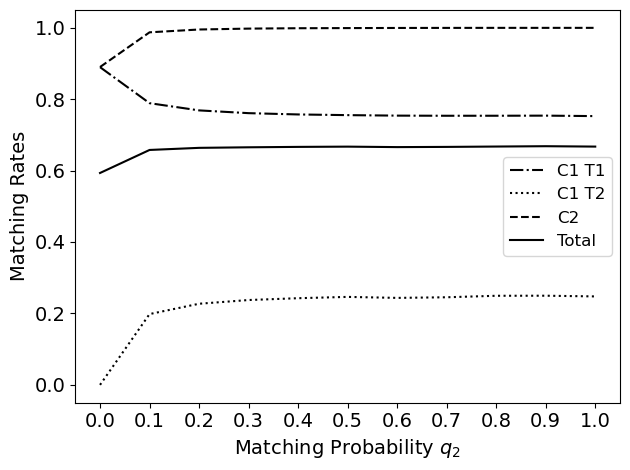

In [16]:
plt.xlabel(r'Matching Probability $q_2$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(q2, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(q2, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(q2, Job_Match_rates,  linestyle='dashed', label = 'C2', color='black')
plt.plot(q2, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(q2, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp2_Match.png')
plt.show()

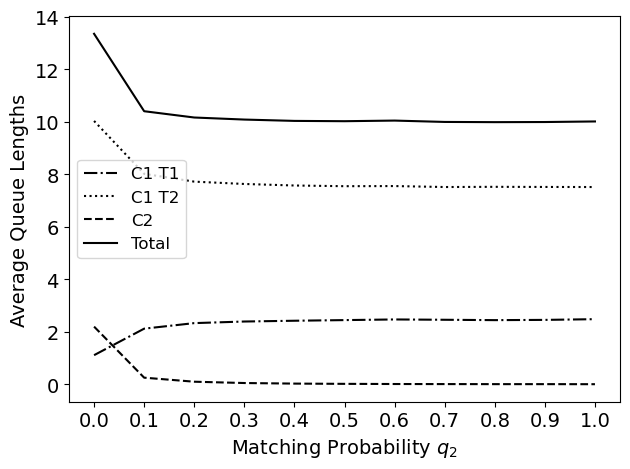

In [17]:
plt.xlabel(r'Matching Probability $q_2$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(q2, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(q2, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(q2, Job_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(q2, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(q2, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp2_Queue.png')
plt.show()



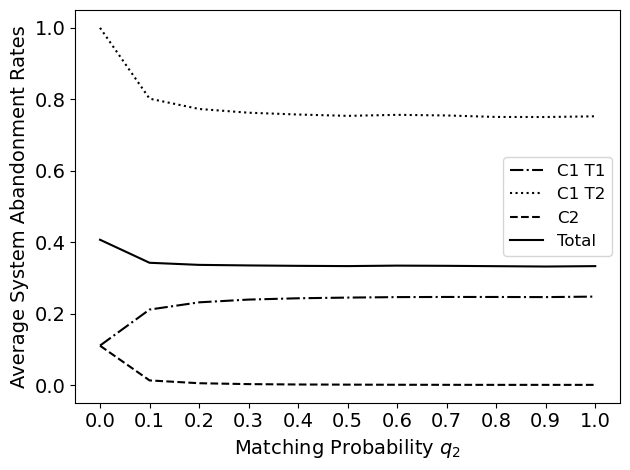

In [18]:
plt.xlabel(r'Matching Probability $q_2$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(q2, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(q2, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(q2, Job_Abandon_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(q2, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(q2, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp2_Abandon.png')
plt.show()

